### K-Nearest Neighbors Applications

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import model_selection
from sklearn import neighbors
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
# loading dataset

df = pd.read_csv("fruit_data_with_colours.csv")

### Exploratory Data Analysis

In [4]:
df.shape

(59, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fruit_label    59 non-null     int64  
 1   fruit_name     59 non-null     object 
 2   fruit_subtype  59 non-null     object 
 3   mass           59 non-null     int64  
 4   width          59 non-null     float64
 5   height         59 non-null     float64
 6   color_score    59 non-null     float64
dtypes: float64(3), int64(2), object(2)
memory usage: 3.4+ KB


In [6]:
df.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [7]:
df.describe()  # summary statistics

,fruit_label,mass,width,height,color_score
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,2.542373,163.118644,7.105085,7.693220,0.762881
std,1.208048,55.018832,0.816938,1.361017,0.076857
min,1.000000,76.000000,5.800000,4.000000,0.550000
25%,1.000000,140.000000,6.600000,7.200000,0.720000
50%,3.000000,158.000000,7.200000,7.600000,0.750000
75%,4.000000,177.000000,7.500000,8.200000,0.810000
max,4.000000,362.000000,9.600000,10.500000,0.930000


In [8]:
columns = df[["mass", "height","width","color_score"]]

for column in columns:
    print(df.groupby("fruit_name").agg({column:["mean", "median",'min', 'max',"std", 'sum',"var"]}),"\n")
    print("--------------------------------------------------------")

                  mass                                               
                  mean median  min  max        std   sum          var
fruit_name                                                           
apple       165.052632    164  140  192  11.969747  3136   143.274854
lemon       150.000000    131  116  216  37.487776  2400  1405.333333
mandarin     81.200000     80   76   86   3.898718   406    15.200000
orange      193.789474    160  140  362  73.635422  3682  5422.175439 

--------------------------------------------------------
              height                                             
                mean median  min   max       std    sum       var
fruit_name                                                       
apple       7.342105    7.3  6.8   7.9  0.291196  139.5  0.084795
lemon       8.856250    8.5  7.5  10.5  0.997977  141.7  0.995958
mandarin    4.380000    4.3  4.0   4.7  0.277489   21.9  0.077000
orange      7.936842    7.8  7.0   9.4  0.769712  150.8

In [9]:
df['fruit_name'].value_counts()

apple       19
orange      19
lemon       16
mandarin     5
Name: fruit_name, dtype: int64

## Data Visualization

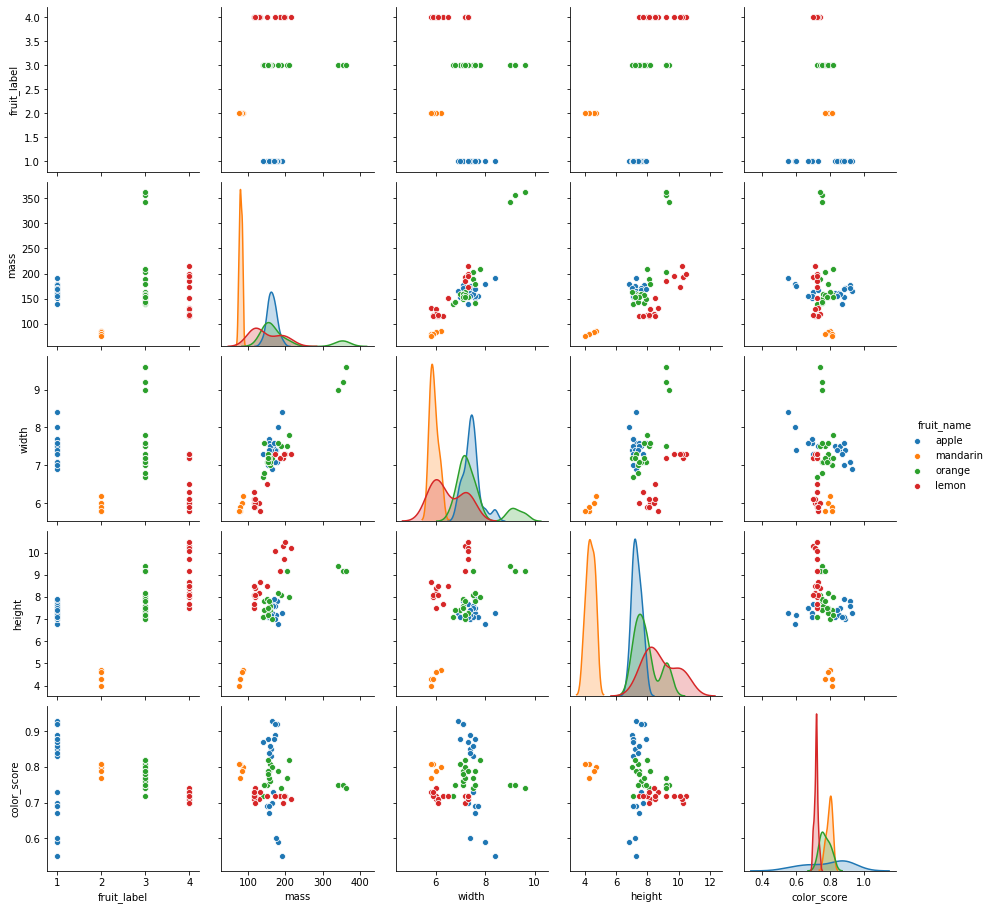

In [10]:
# 1. pairplot
sns.pairplot(df, hue = "fruit_name")

Text(0.5, 1.0, 'mandarin')

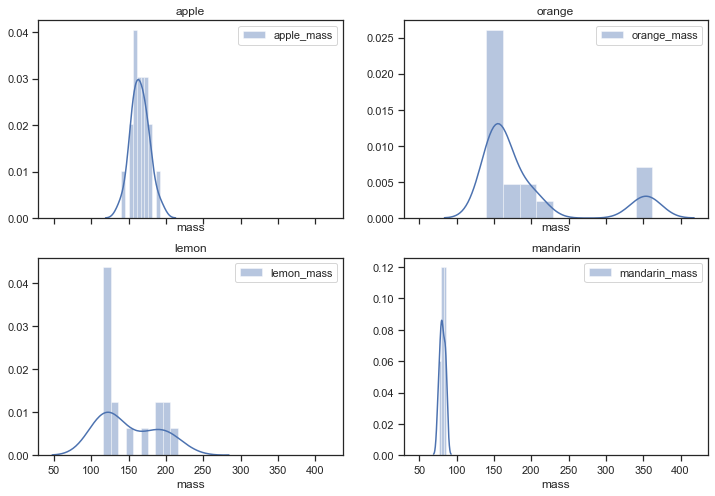

In [11]:
# 2.distplot

sns.set(style = "ticks", color_codes=True)
fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(12, 8), sharex=True)


ax = sns.distplot(df[df['fruit_name'] == 'apple'].mass, bins = 10, label = "apple_mass" , ax = axes[0,0], kde = True)
ax.legend()
ax.set_title('apple')


ax = sns.distplot(df[df['fruit_name'] == 'orange'].mass, bins = 10, label = "orange_mass", ax = axes[0,1], kde = True)
ax.legend()
ax.set_title('orange')


ax = sns.distplot(df[df['fruit_name'] == 'lemon'].mass, bins = 10, label = "lemon_mass", ax = axes[1,0], kde = True)
ax.legend()
ax.set_title('lemon')


ax = sns.distplot(df[df['fruit_name'] == 'mandarin'].mass, bins = 3, label = "mandarin_mass", ax = axes[1,1], kde = True)
ax.legend()
ax.set_title('mandarin')

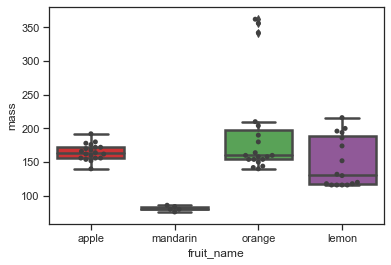

In [12]:
# 3.boxplot

sns.boxplot(x = "fruit_name", y = "mass", data = df, linewidth=2.5, palette="Set1")
sns.swarmplot(x = "fruit_name", y = "mass", data = df, color=".25")

## KNN Model for Classification

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split


X = df[['mass','width','height','color_score']]
Y = df[['fruit_label']]


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [15]:
knn_classifier = KNeighborsClassifier().fit(X_train, y_train)

In [16]:
knn_classifier   # by default the n_neighbors = 5

y_pred = knn_classifier.predict(X_test)


### Evaluating predictions

In [17]:
# Building confusion matrix:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

[[3 0 0 1]
 [0 1 0 0]
 [2 0 2 1]
 [0 0 1 1]]
              precision    recall  f1-score   support

           1       0.60      0.75      0.67         4
           2       1.00      1.00      1.00         1
           3       0.67      0.40      0.50         5
           4       0.33      0.50      0.40         2

    accuracy                           0.58        12
   macro avg       0.65      0.66      0.64        12
weighted avg       0.62      0.58      0.58        12

Accuracy of our model is equal 58.33 %.


### Finding Best k & Model Tunning

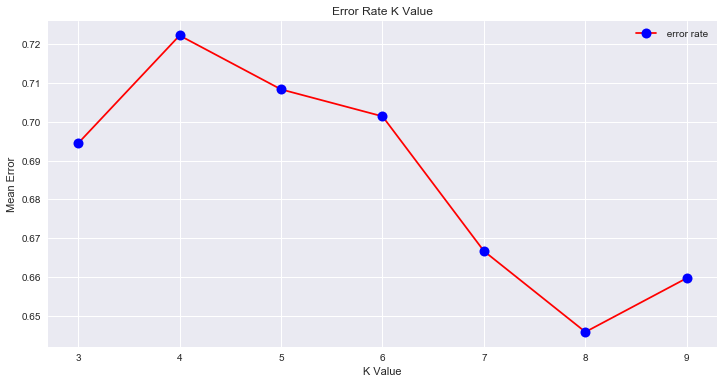

In [18]:
error = []

for k in np.arange(3,10):
    
    knn_model = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
    y_pred = knn_model.predict(X_test)
    error.append(np.mean(y_pred != y_test.values))
    
    
plt.figure(figsize=(12, 6))
plt.style.use('seaborn')
plt.plot(range(3, 10), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10, label = " error rate")
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.legend()


For k= 3 training_accuracy: 0.7659574468085106
For k= 3 testing_accuracy: 0.5833333333333334 

For k= 4 training_accuracy: 0.7659574468085106
For k= 4 testing_accuracy: 0.5833333333333334 

For k= 5 training_accuracy: 0.7872340425531915
For k= 5 testing_accuracy: 0.6666666666666666 

For k= 6 training_accuracy: 0.6808510638297872
For k= 6 testing_accuracy: 0.5 

For k= 7 training_accuracy: 0.6595744680851063
For k= 7 testing_accuracy: 0.5833333333333334 

For k= 8 training_accuracy: 0.6170212765957447
For k= 8 testing_accuracy: 0.4166666666666667 

For k= 9 training_accuracy: 0.6170212765957447
For k= 9 testing_accuracy: 0.4166666666666667 



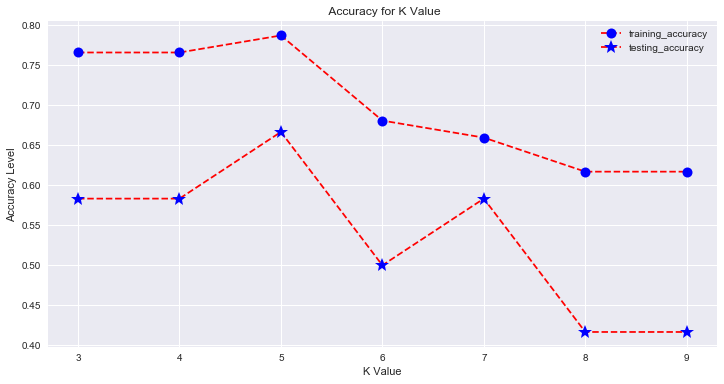

In [19]:
neighbours = np.arange(3,10)
training_accuracy =[]
testing_accuracy = []

for i in np.arange(3,10):
    
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X_train,y_train)
    training_accuracy.append(knn.score(X_train,y_train))
    testing_accuracy.append(knn.score(X_test,y_test))
    print("For k=", i, "training_accuracy:", training_accuracy[i-3] )
    print("For k=", i, "testing_accuracy:", testing_accuracy[i-3],"\n" )
    
    
plt.figure(figsize=(12, 6))
plt.plot(range(3, 10), training_accuracy, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10, label ="training_accuracy")
plt.title(' Accuracy for K Value')
plt.xlabel('K Value')
plt.ylabel("Accuracy Level")
plt.legend()

plt.plot(range(3, 10), testing_accuracy, color='red', linestyle='dashed', marker='*',
         markerfacecolor='blue', markersize=15, label ="testing_accuracy")
plt.title(' Accuracy for K Value')
plt.xlabel('K Value')
plt.ylabel("Accuracy Level")
plt.legend()      

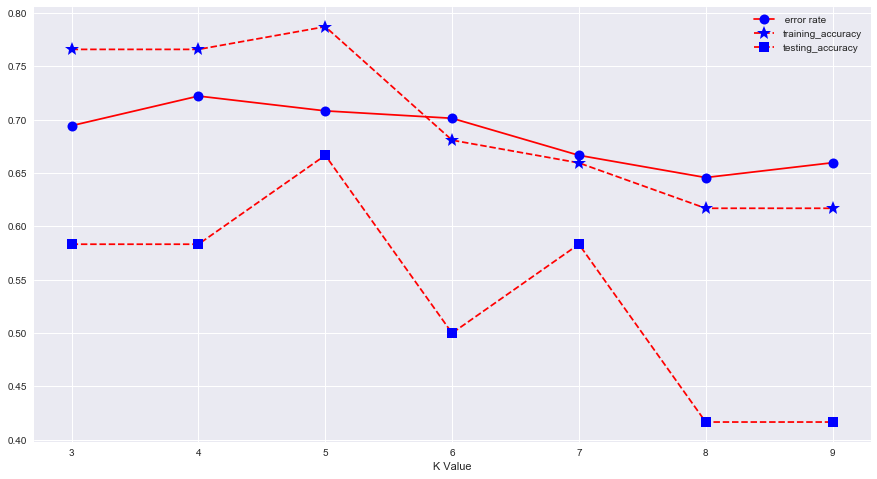

In [20]:
  
plt.figure(figsize=(15, 8))
plt.style.use('seaborn')
plt.plot(range(3, 10), error, color='red', marker='o',
         markerfacecolor='blue', markersize=10, label = " error rate")

plt.xlabel('K Value')

plt.legend()


plt.plot(range(3, 10), training_accuracy, color='red', linestyle='dashed', marker='*',
         markerfacecolor='blue', markersize=15, label ="training_accuracy")
plt.xlabel('K Value')
plt.legend()



plt.plot(range(3, 10), testing_accuracy, color='red', linestyle='dashed', marker='s',
         markerfacecolor='blue', markersize=10, label ="testing_accuracy")
plt.xlabel('K Value')
plt.legend()   
   

In [21]:
# model tuning

knn = KNeighborsClassifier()

In [22]:
knn_params = {"n_neighbors": np.arange(3,10)}

In [23]:
knn_cv_model = GridSearchCV(knn, knn_params, cv = 10).fit(X_train, y_train)

In [24]:
knn_cv_model.best_params_

{'n_neighbors': 4}

In [25]:
knn_cv_model.best_score_

0.64

In [26]:
knn_tuned = KNeighborsClassifier(n_neighbors = 4).fit(X_train, y_train)

y_pred = knn_tuned.predict(X_test)


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))



[[3 0 0 1]
 [0 1 0 0]
 [1 0 2 2]
 [0 0 1 1]]
              precision    recall  f1-score   support

           1       0.75      0.75      0.75         4
           2       1.00      1.00      1.00         1
           3       0.67      0.40      0.50         5
           4       0.25      0.50      0.33         2

    accuracy                           0.58        12
   macro avg       0.67      0.66      0.65        12
weighted avg       0.65      0.58      0.60        12



### Generate Plot for Correlatted Features

In [27]:
df.corr()

,fruit_label,mass,width,height,color_score
fruit_label,1.000000,0.032738,-0.298090,0.508766,-0.310521
mass,0.032738,1.000000,0.877687,0.609571,-0.079794
width,-0.298090,0.877687,1.000000,0.396848,-0.076576
height,0.508766,0.609571,0.396848,1.000000,-0.247047
color_score,-0.310521,-0.079794,-0.076576,-0.247047,1.000000


In [28]:
X = df[['height','color_score']].values
y = df['fruit_label'].values

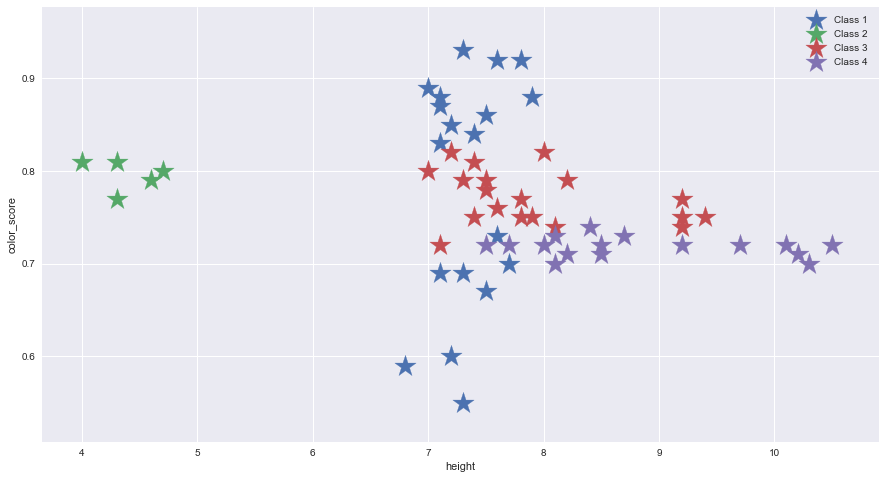

In [29]:

plt.close()
plt.figure(figsize=(15, 8))

for class_i in np.unique(y):
    X_i_correct = X [ (y == class_i) ] 
    plt.scatter(X_i_correct[:, 0], X_i_correct[:, 1], label = 'Class {} '.format(class_i), marker='*', s = 500)   
    plt.xlabel('height')
    plt.ylabel('color_score')
    plt.style.use('seaborn')
    plt.legend()

In [30]:
X = df[['height','color_score']].values
y = df['fruit_label'].values
y_names = df["fruit_name"].unique()

In [31]:
model = KNeighborsClassifier(n_neighbors=4).fit(X, y)

In [32]:
y_pred = model.predict(X)

print("Accuracy Score", accuracy_score(y, y_pred))

Accuracy Score 0.847457627118644


### Generate plot for each class 

#e148f8
#e11811
#e2dd2d
#017719


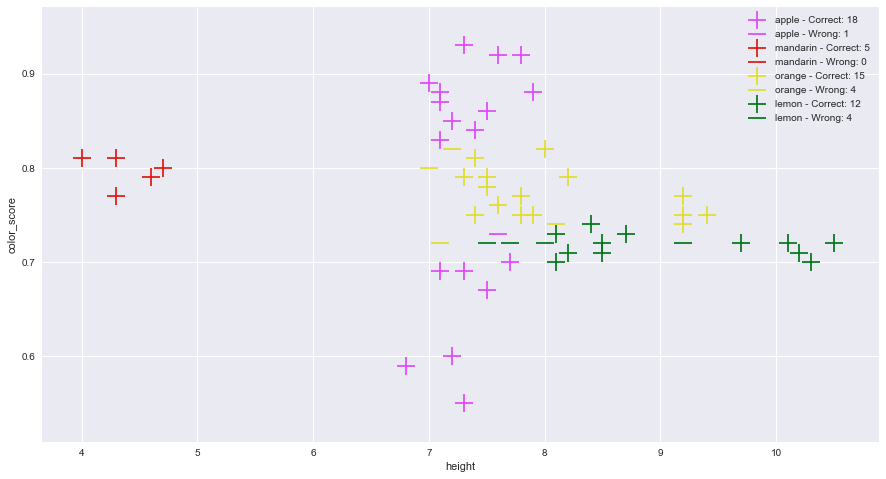

In [41]:

plt.close()
plt.figure(figsize=(15, 8))
for class_i in np.unique(y):
    X_i_correct = X [ (y == class_i) & (y == y_pred)] 
    X_i_wrong = X [ (y == class_i) & (y != y_pred)] 
    
    random_color = "#" + "%06x" % np.random.randint(0, 0xFFFFFF) # 0xFFFFFF is maximum hexadecimal number
    # "%06X" part converts hexadecimal number to six decimal number. For example: 14662776 -> dfbc78
    print(random_color)
    plt.scatter(X_i_correct[:, 0], X_i_correct[:, 1], label = '{} - Correct: {}'.format(y_names[class_i - 1], X_i_correct.shape[0]), marker ='+', s =300, c = random_color)   
    plt.scatter(X_i_wrong[:, 0], X_i_wrong[:, 1], label = '{} - Wrong: {}'.format(y_names[class_i - 1], X_i_wrong.shape[0]), marker ='_' , s = 300, c = random_color)
    plt.xlabel('height')
    plt.ylabel('color_score')
    plt.style.use('seaborn')
    plt.legend()